In [19]:
# imports
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt


# load dataset

In [20]:
# load dataset
df_train = pd.read_csv("../meta/Train.csv")
df_train.head()

# split the dataset into filename and extent




,ID,filename,growth_stage,damage,extent,season
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR2020
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR2021
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR2020
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR2020
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR2021


# Preprocessing

In [21]:
# percentage of each season
df_grouped_by_season =  df_train.groupby("season")

# Calculate the size of each group
group_sizes = df_grouped_by_season.size()

# Calculate the percentage of each group based on the total count
total_count = group_sizes.sum()
group_percentages = (group_sizes / total_count) * 100

# Display group sizes and percentages
print("Group Sizes:")
print(group_sizes)

print("\nGroup Percentages:")
print(group_percentages)





Group Sizes:
season
LR2020    2033
LR2021    7945
SR2020    6163
SR2021    9927
dtype: int64

Group Percentages:
season
LR2020     7.798834
LR2021    30.477981
SR2020    23.642013
SR2021    38.081172
dtype: float64


In [30]:
# image preprocessing helper functions
def get_image_from_file_path(filename):
    image_path = "..\\content\\train\\"+filename
    return  tf.io.read_file(image_path)

def preprocess_image(filename):
    # retrieve the image from the file path
    image = get_image_from_file_path(filename)
    
    # 3 channels = RGB, 1 Channel = Greyscale
    image = tf.image.decode_jpeg(image, channels=3) 
    
    # Resize the image to the desired dimensions (e.g., 224x224)
    image = tf.image.resize(image, (640, 480))
    
    # Normalize the image to the range [0, 1]
    image = image / 255.0
    
    # Ensure the image has the correct data type
    image = tf.cast(image, tf.float32)
    
    # Add a batch dimension (1 image in this case)
    image = tf.expand_dims(image, axis=0)
    
    return image    

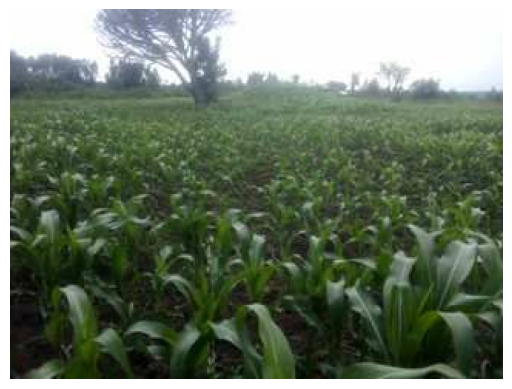

In [31]:
# testing out the image processing helper functions
image = get_image_from_file_path("L1083F00930C39S12674Ip.jpg")
image = tf.image.decode_jpeg(image, channels=3)  # Adjust channels as needed

# Convert the image tensor to a NumPy array
image_array = image.numpy()

# Display the image using Matplotlib
plt.imshow(image_array)
plt.axis('off')  # Optionally, hide the axis
plt.show()







In [32]:
# split the dataframe into image and label arrays (for now)
train_images = []
train_labels = []

for index, row in df_train.iterrows():
    filename= row['filename']
    damage_extent = row['extent']
    
    train_images.append(preprocess_image(filename))
    train_labels.append(damage_extent)


print("train_labels:", train_labels)


# encode labels 

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\0430542\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\0430542\AppData\Local\Temp\ipykernel_34328\2907399600.py", line 9, in <module>
    train_images.append(preprocess_image(filename))
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\0430542\AppData\Local\Temp\ipykernel_34328\733677780.py", line 11, in preprocess_image
    image = tf.image.decode_jpeg(image, channels=3)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\0430542\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\gen_image_ops.py", line 1368, in decode_jpeg
    return decode_jpeg_eager_fallback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\0430542\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\gen_image_ops.py", line 1442, i

In [24]:
# create the cnn model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(640, 480, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [25]:
# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

In [27]:
# test the model